<a href="https://colab.research.google.com/github/mayait/ClaseMachineLearning/blob/main/SupervisedLearning/Classification/LinearRegEjercicio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión lineal

## Objetivo

*   Usar scikit-learn para implementar un modelo de Linear Regression
*   Crear un modelo, entrenarlo, evaluarlo y utilizarlo
*   Optimizar el modelo con regularizaciones

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
!wget -O https://raw.githubusercontent.com/mayait/ClaseAnalisisDatos/main/machine_learning/datasets/advertising_and_sales_clean.csv
!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
!wget -O https://github.com/mayait/ClaseAnalisisDatos/raw/main/machine_learning/datasets/crime.xlsx

wget: missing URL
Usage: wget [OPTION]... [URL]...

Try `wget --help' for more options.
--2023-02-25 02:02:05--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.1s    

2023-02-25 02:02:05 (482 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]

wget: missing URL
Usage: wget [OPTION]... [URL]...

Try `wget --help' for more options.


### `FuelConsumption.csv`:

Fuel consumption dataset, **`FuelConsumption.csv`**, Contiene las calificaciones de consumo de combustible específicas del modelo y las emisiones estimadas de dióxido de carbono para vehículos ligeros nuevos para la venta al por menor en Canadá. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

*   **MODELYEAR** e.g. 2014
*   **MAKE** e.g. Acura
*   **MODEL** e.g. ILX
*   **VEHICLE CLASS** e.g. SUV
*   **ENGINE SIZE** e.g. 4.7
*   **CYLINDERS** e.g 6
*   **TRANSMISSION** e.g. A6
*   **FUELTYPE** e.g. z
*   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
*   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
*   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
*   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0

In [3]:
df = pd.read_csv("FuelConsumption.csv")
df.sample(10)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
499,2014,HONDA,PILOT,SUV - SMALL,3.5,6,A5,X,13.3,9.3,11.5,25,265
849,2014,NISSAN,MURANO AWD,SUV - SMALL,3.5,6,AV,X,13.2,10.1,11.8,24,271
408,2014,FORD,FOCUS SFE FFV,COMPACT,2.0,4,A6,E,11.6,8.3,10.1,28,162
803,2014,MINI,COOPER S ROADSTER,TWO-SEATER,1.6,4,M6,Z,9.1,6.7,8.0,35,184
544,2014,INFINITI,QX70 AWD,SUV - SMALL,3.7,6,AS7,Z,14.5,10.7,12.8,22,294
281,2014,CHRYSLER,200 SEDAN FFV,MID-SIZE,3.6,6,A6,X,12.5,8.1,10.5,27,242
740,2014,MERCEDES-BENZ,E 300 4MATIC,MID-SIZE,3.5,6,AS7,Z,11.8,8.2,10.2,28,235
46,2014,AUDI,R8,TWO-SEATER,5.2,10,A7,Z,18.8,11.3,15.4,18,354
275,2014,CHRYSLER,200 CONVERTIBLE,COMPACT,2.4,4,A4,X,11.7,8.2,10.1,28,232
126,2014,BMW,X1 xDRIVE28i,SUV - SMALL,2.0,4,A8,Z,10.6,7.2,9.1,31,209


In [ ]:
from sklearn.model_selection import train_test_split    
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# importa en df crime.xlsx
df = pd.read_excel("crime.xlsx")
df.sample(10)

# Seleccionamos las caracteristicas que vamos a utilizar que son todas menos ViolentCrimesPerPop
X = df.drop(['ViolentCrimesPerPop'], axis=1)

# Seleccionamos la variable a predecir
Y = df['ViolentCrimesPerPop']

# Divide la data en train y test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Instanciamos el modelo
regr = LinearRegression()

# Entrenamos el modelo
regr.fit(X_train, Y_train)

LinearRegression()

In [4]:
# Vamos a utilizar solo las siguientes caracteristicas para este ejercicio
# Para X serán: 'ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB'
# Para Y será: 'CO2EMISSIONS'
# Divide la data en train y test con un 70% para train y 30% para test

from sklearn.model_selection import train_test_split    
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Seleccionamos las caracteristicas que vamos a utilizar
X = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB']]

# Seleccionamos la variable a predecir
Y = df['CO2EMISSIONS']

# Divide la data en train y test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Instanciamos el modelo
regr = LinearRegression()

# Entrenamos el modelo
regr.fit(X_train, Y_train)


LinearRegression()

In [5]:
# Haz una función que entrene un modelo re regresión lineal recibiendo X_train, X_test, Y_train, Y_test
# La funcion devuelve el error cuadrático medio (MSE) y el coeficiente de determinación (R2) para train y test
# Calcula si el modelo está sobreajustado, subajustado o tiene un buen ajuste

from sklearn.metrics import mean_squared_error, r2_score

def entrenar_modelo(X_train, X_test, Y_train, Y_test):
    # Instanciamos el modelo
    regr = LinearRegression()
    
    # Entrenamos el modelo
    regr.fit(X_train, Y_train)
    
    # Hacemos las predicciones
    Y_pred_train = regr.predict(X_train)
    Y_pred_test = regr.predict(X_test)
    
    # Calculamos el MSE
    mse_train = mean_squared_error(Y_train, Y_pred_train)
    mse_test = mean_squared_error(Y_test, Y_pred_test)
    
    # Calculamos el R2
    r2_train = r2_score(Y_train, Y_pred_train)
    r2_test = r2_score(Y_test, Y_pred_test)

    # Imprime los resultados
    print("MSE train: %.2f" % mse_train)
    print("MSE test: %.2f" % mse_test)
    print("R2 train: %.2f" % r2_train)
    print("R2 test: %.2f" % r2_test)

    # calcula si el modelo está sobreajustado, subajustado o tiene un buen ajuste
    if r2_train > r2_test:  
        print("El modelo está sobreajustado")
    elif r2_train < r2_test:
        print("El modelo está subajustado")
    else:
        print("El modelo tiene un buen ajuste")
        
    return mse_train, mse_test, r2_train, r2_test

entrenar_modelo(X_train, X_test, Y_train, Y_test)

MSE train: 563.97
MSE test: 502.45
R2 train: 0.86
R2 test: 0.88
El modelo está subajustado


(563.9675185805852, 502.4460931860747, 0.8590623862972946, 0.8754316437513163)

# Ridge

In [6]:
# Importa ridge de sklearn.linear_model
# Crea una funcion que ajuste un modelo de regresion ridge con diferentes valores de alpha
# La funcion debe devolver el MSE y el R2 para train y test

from sklearn.linear_model import Ridge

def entrenar_modelo_ridge(X_train, X_test, Y_train, Y_test):

    # alphas
    alphas = [0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]


    # Crea una tabla vacia para almacenar los resultados de Alpha, MSE y R2 para train y test
    df_ridge = pd.DataFrame(columns=['Alpha', 'MSE_train', 'MSE_test', 'R2_train', 'R2_test'])

    # Itera sobre los diferentes valores de alpha
    for alpha in alphas:
        # Instanciamos el modelo
        ridge = Ridge(alpha=alpha)
    
        # Entrenamos el modelo
        ridge.fit(X_train, Y_train)
    
        # Hacemos las predicciones
        Y_pred_train = ridge.predict(X_train)
        Y_pred_test = ridge.predict(X_test)
    
        # Calculamos el MSE
        mse_train = mean_squared_error(Y_train, Y_pred_train)
        mse_test = mean_squared_error(Y_test, Y_pred_test)
        
        # Calculamos el R2
        r2_train = r2_score(Y_train, Y_pred_train)
        r2_test = r2_score(Y_test, Y_pred_test)

        # Guarda los resultados en la tabla df_ridge con pandas.concat
        df_ridge = pd.concat([df_ridge, pd.DataFrame([[alpha, mse_train, mse_test, r2_train, r2_test]], columns=['Alpha', 'MSE_train', 'MSE_test', 'R2_train', 'R2_test'])])

    # Imprime la tabla df_ridge
    print(df_ridge)


    # ¿Que valor de alpha tiene el mejor R2, imprime todos los valores para ese alpha?
    print(df_ridge[df_ridge['R2_test'] == df_ridge['R2_test'].max()])
        
    return mse_train, mse_test, r2_train, r2_test
entrenar_modelo_ridge(X_train, X_test, Y_train, Y_test)

     Alpha   MSE_train    MSE_test  R2_train   R2_test
0     0.01  563.967776  502.439779  0.859062  0.875433
0     0.10  563.984754  502.411339  0.859058  0.875440
0     1.00  564.184921  502.503813  0.859008  0.875417
0    10.00  564.395773  502.803279  0.858955  0.875343
0   100.00  566.180055  506.472236  0.858509  0.874433
0  1000.00  600.649998  556.252220  0.849895  0.862092
   Alpha   MSE_train    MSE_test  R2_train  R2_test
0    0.1  563.984754  502.411339  0.859058  0.87544


(600.649997953542, 556.2522202760108, 0.8498952961064709, 0.8620918230250779)

# Lasso

In [7]:
# Importa lasso de sklearn.linear_model
# Crea una funcion que ajuste un modelo de regresion lasso con diferentes valores de alpha
# La funcion debe devolver el MSE y el R2 para train y test


from sklearn.linear_model import Lasso

def entrenar_modelo_lasso(X_train, X_test, Y_train, Y_test):

    # alphas
    alphas = [0.1, 1.0, 2, 10.0, 100.0, 1000.0]


    # Crea una tabla vacia para almacenar los resultados de Alpha, MSE y R2 para train y test
    df_lasso = pd.DataFrame(columns=['Alpha', 'MSE_train', 'MSE_test', 'R2_train', 'R2_test'])

    # Itera sobre los diferentes valores de alpha
    for alpha in alphas:
        # Instanciamos el modelo
        lasso = Lasso(alpha=alpha, max_iter = 10000)
    
        # Entrenamos el modelo
        lasso.fit(X_train, Y_train)
    
        # Hacemos las predicciones
        Y_pred_train = lasso.predict(X_train)
        Y_pred_test = lasso.predict(X_test)
    
        # Calculamos el MSE
        mse_train = mean_squared_error(Y_train, Y_pred_train)
        mse_test = mean_squared_error(Y_test, Y_pred_test)
        
        # Calculamos el R2
        r2_train = r2_score(Y_train, Y_pred_train)
        r2_test = r2_score(Y_test, Y_pred_test)
        

        # Guarda los resultados en la tabla df_ridge con pandas.concat
        df_lasso = pd.concat([df_lasso, pd.DataFrame([[alpha, mse_train, mse_test, r2_train, r2_test]], columns=['Alpha', 'MSE_train', 'MSE_test', 'R2_train', 'R2_test'])])

    # Imprime la tabla df_ridge
    print(df_lasso)


    # ¿Que valor de alpha tiene el mejor R2, imprime todos los valores para ese alpha?
    print('El mejor valor de alpha es: ')
    print(df_lasso[df_lasso['R2_test'] == df_lasso['R2_test'].max()])
        
    return mse_train, mse_test, r2_train, r2_test
entrenar_modelo_lasso(X_train, X_test, Y_train, Y_test)

    Alpha    MSE_train     MSE_test  R2_train   R2_test
0     0.1   564.237008   502.547691  0.858995  0.875406
0     1.0   565.659826   504.236856  0.858639  0.874988
0     2.0   569.854160   509.378207  0.857591  0.873713
0    10.0   638.831620   598.389179  0.840354  0.851645
0   100.0  1378.052135  1380.533319  0.655620  0.657733
0  1000.0  4001.540141  4038.873834  0.000000 -0.001333
El mejor valor de alpha es: 
   Alpha   MSE_train    MSE_test  R2_train   R2_test
0    0.1  564.237008  502.547691  0.858995  0.875406


(4001.5401408045773, 4038.873834457047, 0.0, -0.0013330414489061138)

# Polynomial

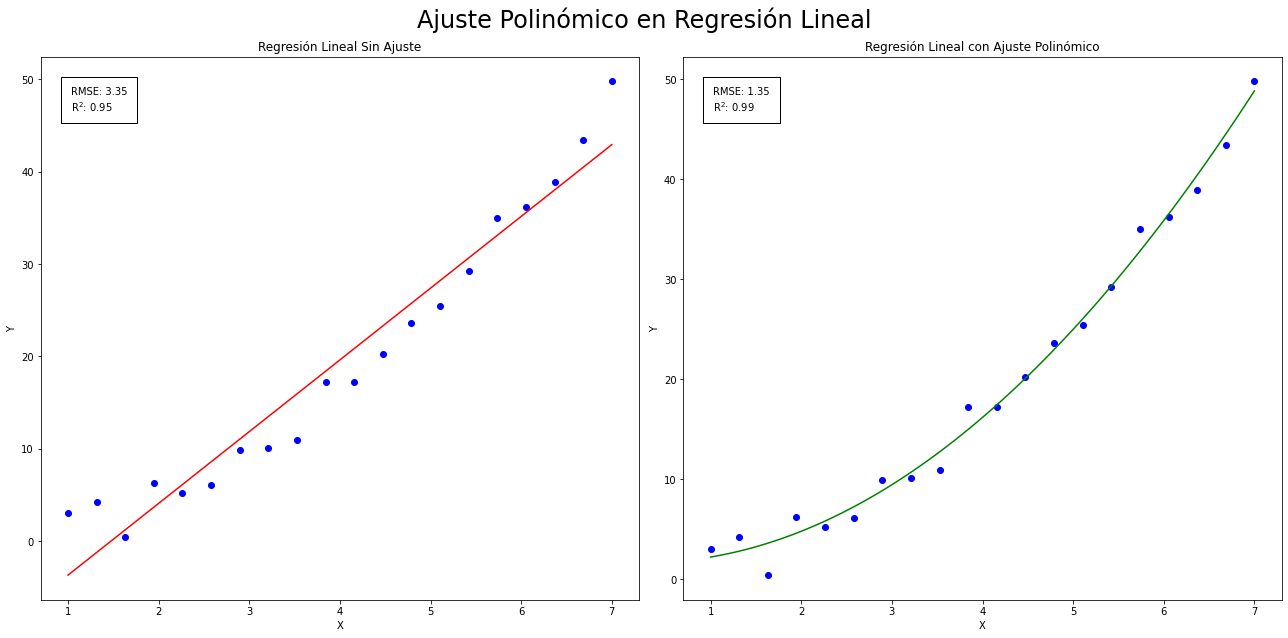

In [5]:
#@title Ajuste Polinómico en Regresión Lineal

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Generar puntos de datos
x = np.linspace(1, 7, num=20)
y = x ** 2 + np.random.normal(scale=2, size=20)

# Crear una figura con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 9))

# Graficar el primer gráfico (regresión lineal sin ajuste)
ax1.scatter(x, y, color='blue')
ax1.set_title('Regresión Lineal Sin Ajuste')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')

# Ajustar una función lineal (grado=1) sin ajuste
pendiente, intercep = np.polyfit(x, y, 1)
funcion_lineal = np.poly1d((pendiente, intercep))
x_vals = np.linspace(x[0], x[-1], 100)
y_vals = funcion_lineal(x_vals)
ax1.plot(x_vals, y_vals, color='red')

# Calcular RMSE y R^2
y_pred = funcion_lineal(x)
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)
ax1.text(0.05, 0.9, 'RMSE: {:.2f}\nR$^2$: {:.2f}'.format(rmse, r2),
         transform=ax1.transAxes, bbox=dict(facecolor='white', edgecolor='black', pad=10))

# Graficar el segundo gráfico (regresión lineal con ajuste polinómico)
ax2.scatter(x, y, color='blue')
ax2.set_title('Regresión Lineal con Ajuste Polinómico')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')

# Ajustar una función polinómica (grado=2) con ajuste
grado = 2
coeficientes = np.polyfit(x, y, grado)
polinomio = np.poly1d(coeficientes)
x_vals = np.linspace(x[0], x[-1], 100)
y_vals = polinomio(x_vals)
ax2.plot(x_vals, y_vals, color='green')

# Calcular RMSE y R^2
y_pred = polinomio(x)
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)
ax2.text(0.05, 0.9, 'RMSE: {:.2f}\nR$^2$: {:.2f}'.format(rmse, r2),
         transform=ax2.transAxes, bbox=dict(facecolor='white', edgecolor='black', pad=10))

# Agregar un título a la figura
fig.suptitle('Ajuste Polinómico en Regresión Lineal', fontsize=24)

# Ajustar el diseño y mostrar la figura
fig.tight_layout()
plt.show()

In [10]:
# Crea una función que ajuste un modelo de regresión polinomial con diferentes grados
# Importa PolynomialFeatures    
# Crea objeto PolynomialFeatures con el grado deseado
# La funcion debe devolver el MSE y el R2 para train y test

from sklearn.preprocessing import PolynomialFeatures

def entrenar_modelo_polinomial(X_train, X_test, Y_train, Y_test):
    
        # grados
        grados = [2, 3]
    
        # Crea una tabla vacia para almacenar los resultados de grado, MSE y R2 para train y test
        df_polinomial = pd.DataFrame(columns=['Grado', 'MSE_train', 'MSE_test', 'R2_train', 'R2_test', 'Modelo'])
    
        # Itera sobre los diferentes grados
        for grado in grados:
            
            # Instanciamos el objeto transformador PolynomialFeatures
            poly = PolynomialFeatures(degree=grado)
            
            # Transforma los datos de entrenamiento y prueba en un conjunto de características polinómicas
            X_train_poly = poly.fit_transform(X_train)
            X_test_poly = poly.transform(X_test)

            print('Grado: ', grado)
            
             # Entrenamos el modelo con Least Squares
            print('Entrenando modelo con Least Squares')
            mse_train, mse_test, r2_train, r2_test = entrenar_modelo(X_train_poly, X_test_poly, Y_train, Y_test)

            # Añadimos los resultados a la tabla df_polinomial
            df_polinomial = pd.concat([df_polinomial, pd.DataFrame([[grado, mse_train, mse_test, r2_train, r2_test, 'Least Squares']], columns=['Grado', 'MSE_train', 'MSE_test', 'R2_train', 'R2_test', 'Modelo'])])

            # Entrenamos el modelo con Ridge
            print('Entrenando modelo con Ridge')
            entrenar_modelo_ridge(X_train_poly, X_test_poly, Y_train, Y_test)

            # Entrenamos el modelo con Lasso
            print('Entrenando modelo con Lasso')
            entrenar_modelo_lasso(X_train_poly, X_test_poly, Y_train, Y_test)
            
        return None

entrenar_modelo_polinomial(X_train, X_test, Y_train, Y_test)

Grado:  2
Entrenando modelo con Least Squares
MSE train: 380.98
MSE test: 337.70
R2 train: 0.90
R2 test: 0.92
El modelo está subajustado
Entrenando modelo con Ridge
     Alpha   MSE_train    MSE_test  R2_train   R2_test
0     0.01  382.740983  332.022191  0.904352  0.917684
0     0.10  383.732715  331.095538  0.904104  0.917914
0     1.00  385.653483  329.002347  0.903624  0.918432
0    10.00  387.962734  323.984160  0.903047  0.919677
0   100.00  405.256524  325.410634  0.898725  0.919323
0  1000.00  485.673015  401.377532  0.878628  0.900489
   Alpha   MSE_train   MSE_test  R2_train   R2_test
0   10.0  387.962734  323.98416  0.903047  0.919677
Entrenando modelo con Lasso


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.066e+05, tolerance: 2.985e+02
  model = cd_fast.enet_coordinate_descent(


    Alpha    MSE_train     MSE_test  R2_train   R2_test
0     0.1   390.127310   320.093506  0.902506  0.920641
0     1.0   416.336475   338.824020  0.895956  0.915997
0     2.0   433.714552   358.377102  0.891613  0.911150
0    10.0   649.279080   604.713386  0.837743  0.850077
0   100.0   752.131795   718.795137  0.812039  0.821794
0  1000.0  1234.862667  1270.038721  0.691403  0.685127
El mejor valor de alpha es: 
   Alpha  MSE_train    MSE_test  R2_train   R2_test
0    0.1  390.12731  320.093506  0.902506  0.920641
Grado:  3
Entrenando modelo con Least Squares
MSE train: 415.79
MSE test: 497.16
R2 train: 0.90
R2 test: 0.88
El modelo está sobreajustado
Entrenando modelo con Ridge
     Alpha   MSE_train    MSE_test  R2_train   R2_test
0     0.01  258.008025  284.139367  0.935523  0.929555
0     0.10  260.580562  282.467337  0.934880  0.929970
0     1.00  264.045350  277.086679  0.934014  0.931304
0    10.00  274.040649  280.337659  0.931516  0.930498
0   100.00  316.579666  325.46359

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.235e+05, tolerance: 2.985e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.404e+05, tolerance: 2.985e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.377e+05, tolerance: 2.985e+02

    Alpha   MSE_train    MSE_test  R2_train   R2_test
0     0.1  313.311141  272.643257  0.921702  0.932405
0     1.0  352.011790  298.307796  0.912031  0.926042
0     2.0  426.529953  378.007037  0.893409  0.906283
0    10.0  456.196223  411.377966  0.885995  0.898010
0   100.0  523.441667  479.808531  0.869190  0.881044
0  1000.0  919.923240  924.283855  0.770108  0.770848
El mejor valor de alpha es: 
   Alpha   MSE_train    MSE_test  R2_train   R2_test
0    0.1  313.311141  272.643257  0.921702  0.932405


# Normalización Min-Max

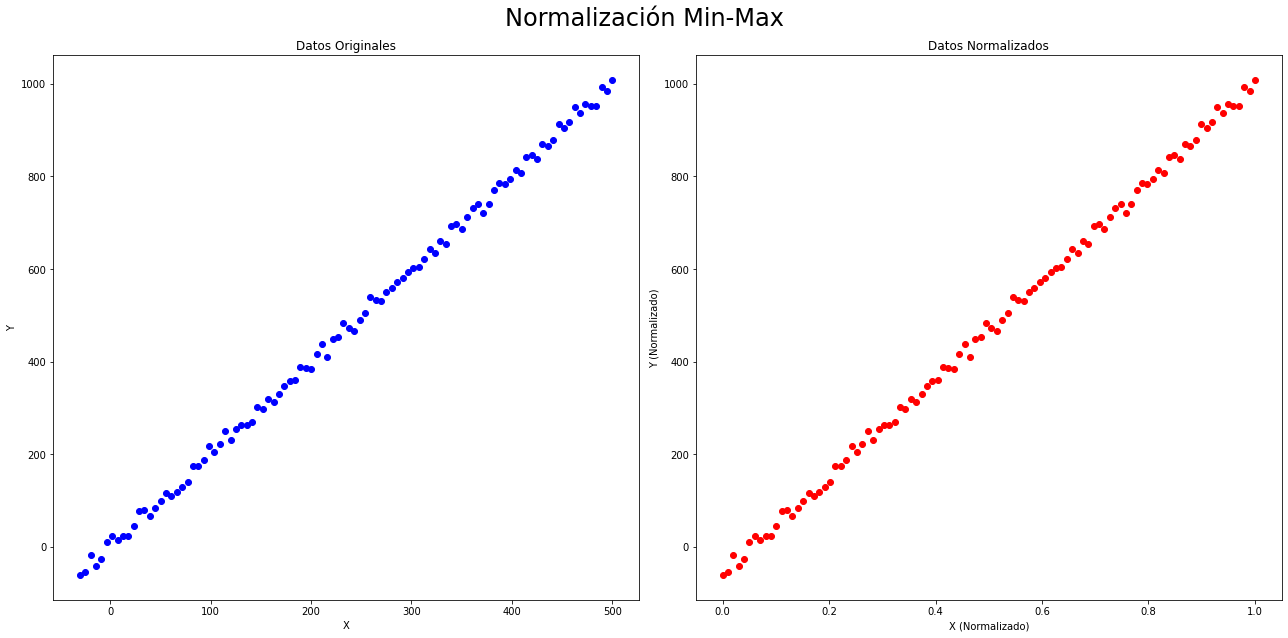

In [6]:
#@title Min Max Norm

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Generar puntos de datos
x = np.linspace(-30, 500, num=100)
y = 2 * x + np.random.normal(scale=10, size=100)

# Normalizar los datos utilizando la normalización min-max
scaler = MinMaxScaler()
x_norm = scaler.fit_transform(x.reshape(-1, 1)).ravel()
y_norm = y.reshape(-1, 1).ravel()

# Crear una figura con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 9))

# Graficar el primer gráfico (datos originales)
ax1.scatter(x, y, color='blue')
ax1.set_title('Datos Originales')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')

# Graficar el segundo gráfico (datos normalizados)
ax2.scatter(x_norm, y_norm, color='red')
ax2.set_title('Datos Normalizados')
ax2.set_xlabel('X (Normalizado)')
ax2.set_ylabel('Y (Normalizado)')

# Agregar un título a la figura
fig.suptitle('Normalización Min-Max', fontsize=24)

# Ajustar el diseño y mostrar la figura
fig.tight_layout()
plt.show()



In [ ]:
# Crea una función que normalice los datos de train y test utilizando MinMaxScaler
# Importa MinMaxScaler de sklearn.preprocessing
# Crea objeto MinMaxScaler los datos de train y test
# Ajustar el escalador a los datos de entrenamiento y transformar los datos
# Crear un objeto LinearRegression y ajustar el modelo a los datos de entrenamiento escalados
# Transformar los datos de prueba utilizando el mismo objeto escalador
# Realizar predicciones sobre los datos de prueba escalados utilizando el modelo entrenado
# Evaluar el rendimiento del modelo


from sklearn.preprocessing import MinMaxScaler

def entrenar_modelo_normalizado(X_train, X_test, Y_train, Y_test):
    
        # Instancia MinMaxScaler
        scaler = MinMaxScaler()
    
        # Ajusta el escalador a los datos de entrenamiento
        scaler.fit_transform(X_train)
    
        # Transforma los datos de entrenamiento
        X_train_scaled = scaler.transform(X_train)
    
        # Transforma los datos de prueba
        X_test_scaled = scaler.transform(X_test)

        # Entrenamos el modelo con Least Squares
        print('Entrenando modelo con Least Squares')
        entrenar_modelo(X_train_scaled, X_test_scaled, Y_train, Y_test)

        # Entrenamos el modelo con Ridge
        print('Entrenando modelo con Ridge')
        entrenar_modelo_ridge(X_train_scaled, X_test_scaled, Y_train, Y_test)

        # Entrenamos el modelo con Lasso
        print('Entrenando modelo con Lasso')
        entrenar_modelo_lasso(X_train_scaled, X_test_scaled, Y_train, Y_test)


entrenar_modelo_normalizado(X_train, X_test, Y_train, Y_test)

NameError: name 'X_train' is not defined

In [ ]:
# Importa ridge de sklearn.linear_model
# Crea una funcion que ajuste un modelo de regresion ridge con diferentes valores de alpha
# La funcion debe devolver el MSE y el R2 para train y test

from sklearn.linear_model import Ridge

def entrenar_modelo_ridge(X_train, X_test, Y_train, Y_test):

    # alphas
    alphas = [0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]


    # Crea una tabla vacia para almacenar los resultados de Alpha, MSE y R2 para train y test
    df_ridge = pd.DataFrame(columns=['Alpha', 'MSE_train', 'MSE_test', 'R2_train', 'R2_test'])

    # Itera sobre los diferentes valores de alpha
    for alpha in alphas:
        # Instanciamos el modelo
        ridge = Ridge(alpha=alpha)
    
        # Entrenamos el modelo
        ridge.fit(X_train, Y_train)
    
        # Hacemos las predicciones
        Y_pred_train = ridge.predict(X_train)
        Y_pred_test = ridge.predict(X_test)
    
        # Calculamos el MSE
        mse_train = mean_squared_error(Y_train, Y_pred_train)
        mse_test = mean_squared_error(Y_test, Y_pred_test)
        
        # Calculamos el R2
        r2_train = r2_score(Y_train, Y_pred_train)
        r2_test = r2_score(Y_test, Y_pred_test)

        # Guarda los resultados en la tabla df_ridge con pandas.concat
        df_ridge = pd.concat([df_ridge, pd.DataFrame([[alpha, mse_train, mse_test, r2_train, r2_test]], columns=['Alpha', 'MSE_train', 'MSE_test', 'R2_train', 'R2_test'])])

    # Imprime la tabla df_ridge
    print(df_ridge)


    # ¿Que valor de alpha tiene el mejor R2, imprime todos los valores para ese alpha?
    print(df_ridge[df_ridge['R2_test'] == df_ridge['R2_test'].max()])
        
    return mse_train, mse_test, r2_train, r2_test
entrenar_modelo_ridge(X_train, X_test, Y_train, Y_test)

/Users/julianmaya/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=5.89638e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


     Alpha      MSE_train       MSE_test  R2_train   R2_test
0     0.01  126485.659256  136488.021736  0.679168  0.597819
0     0.10  126489.212877  136432.800581  0.679159  0.597982
0     1.00  126592.977465  136188.777925  0.678895  0.598701
0    10.00  127269.849475  136274.239301  0.677178  0.598449
0   100.00  127941.644070  136316.739051  0.675474  0.598324
0  1000.00  130038.697393  137499.471957  0.670155  0.594839
   Alpha      MSE_train       MSE_test  R2_train   R2_test
0    1.0  126592.977465  136188.777925  0.678895  0.598701


(130038.69739325832,
 137499.47195725673,
 0.6701552327178322,
 0.5948390564598236)